In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 50)

In [2]:
## online db
# https://cgmix.uscg.mil/IIR/IIRSearch.aspx

## data files
enforce_data = pd.read_excel('../data/misle/MISLE Enforcement Activities DT.xlsx')
fac_data = pd.read_excel('../data/misle/MISLE Facility Activities DT.xlsx')
vessel_data = pd.read_excel('../data/misle/MISLE Vessel Activities DT.xlsx')
incident_data = pd.read_excel('../data/misle/MISLE Incident Investigations DT.xlsx')
#incident_data = pd.read_csv('../data/misle/MISLEIncidentInvestigationsDT_FILTERED.csv')
incident_data['Activity Date']= pd.to_datetime(incident_data['Activity Date'])
#scraped from incident_data.activity_id column values
scraped_briefs_data = pd.read_csv('../data/misle/scrape/misle-scraped-brief.csv')
brief_notes_data = pd.read_csv('../data/misle/incident_brief_notes.csv')


Let's figure out which `incident_data.activity_id` values didn't fetch brief data. Then we can try to manually enter these to see if they in fact don't have briefs.

In [3]:
incident_activity_list = incident_data['Activity ID'].tolist()
scraped_activity_list = scraped_briefs_data.activity_id.tolist()

not_scraped = []
for activity_id in incident_activity_list:
    if activity_id not in scraped_activity_list:
        not_scraped.append(activity_id)

In [93]:
len(not_scraped)

1098

In the process of doing a random sample check, I found that several `activity_ids` were present in the online interface, with an attached brief that could have been scraped. So I'm going to have to try these ones that didn't resolve again.

Randomly selected activity_ids that did resolve when checked manually:
- 3702509
- 3691634
- 4548573

------

After rerunning the `activity_ids` that did not resolve on the first attempt, another 47 records were scraped. A subsequent random check of the second round `activity_ids` that did not resolve returned no records that resolved manually.

In [94]:
enforce_data.head()

,Case ID,Activity ID,MISLE Enforcement Activity ID,Activity Start Date,Originating Department,Owner Department,Controlling Department,Enforcement Activity Type,Party Class,Party Role,Penalty Amount Imposed,Penalty Amount Recommended,Probationary Period Months Imposed,Probationary Period Months Recommended,Probationary Suspension Months Imposed,Probationary Suspension Months Recommended,Outright Suspension Months Imposed,Outright Suspension Months Recommended
0,486041.0,3658917,3658917,2010-01-05,MSU HUNTINGTON (007767),MSU HUNTINGTON (007767),MSU HUNTINGTON (007767),Warning (Civil Penalty),Organization,UNSPECIFIED,0,0,0,0,0,0,0,0
1,471472.0,3662189,3662189,2010-01-11,MSU HUNTINGTON (007767),MSU HUNTINGTON (007767),CG HEARING OFFICE (000809),Administrative Civil Penalty (Class I),Organization,UNSPECIFIED,3000,5000,0,0,0,0,0,0
2,486168.0,3663897,3663897,2010-01-14,MSU PADUCAH (007766),MSU PADUCAH (007766),MSU PADUCAH (007766),Suspension and Revocation,Person,Subject of Investigation,0,0,0,0,0,0,0,0
3,486186.0,3667584,3667584,2010-01-21,MSU PADUCAH (007766),MSU PADUCAH (007766),MSU PADUCAH (007766),Notice of Violation (NOV),Organization,UNSPECIFIED,0,500,0,0,0,0,0,0
4,486748.0,3670688,3670688,2010-01-27,MSU HUNTINGTON (007767),MSU HUNTINGTON (007767),MSU HUNTINGTON (007767),Notice of Violation (NOV),Organization,UNSPECIFIED,500,0,0,0,0,0,0,0


In [6]:
fac_data.head()

,Activity ID,Activity Start Date,Originating Department,Activity Type,Facility Name,Primary ID,Primary ID Type,Facility Type,Facility Address,City,State (Address),Postal Code,Country,Facility Latitude,Facility Longitude,State (Physical Location)
0,3658288,2010-01-04,MSU PITTSBURGH (007764),Facility Inspection,Neville Chemical Company,PITMS422,Unique Id,Waterfront Facility,2800 Neville Road,Pittsburgh,PA,15225,US,40.505700,-80.102710,PA
1,3658584,2010-01-04,MSU PITTSBURGH (007764),Facility Inspection,ERGON West Virginia Inc.,PITMS408,Unique Id,Waterfront Facility,ERGON,Newell,WV,26050,US,40.602222,-80.633610,WV
2,3658459,2010-01-04,SECTOR OHIO VALLEY (007728),Facility Inspection,CHEVRON (LOUISVILLE),LOUMS010,Unique Id,Waterfront Facility,4401 Bells Lane,Louisville,KY,40211,US,38.233333,-85.834163,KY
3,3658420,2010-01-04,SECTOR OHIO VALLEY (007728),Facility Inspection,THE GLENMORE DISTILLERY (OWENSBORO),LOUMS049,Unique Id,Waterfront Facility,2100 Hwy 60 East,Owensboro,KY,42302-1069,US,37.777500,-87.087222,KY
4,3658272,2010-01-04,MSU PITTSBURGH (007764),Facility Inspection,Gordon Terminal Service Co,PITMS411,Unique Id,Waterfront Facility,GORDON TERMINAL SERV CO,MCKEES ROCKS,PA,15136,US,40.467778,-80.051115,PA


In [7]:
vessel_data.head()

,Activity ID,Activity Date,Department,Activity Type,Activity Status,Activity Close Date,Activity Duration (Days),MISLE Vessel ID,IMO Number,Official Number,Hull Number,Vessel Name,Vessel Class,Vessel Type,Vessel Subtype,Vessel Service,Flag Abbr.,Length,Default Gross Tons,Regulatory Gross Tons,ITC Gross Tons,Inspected,Documented,Latitude,Longitude
0,3662131,2010-01-04,SECTOR OHIO VALLEY (007728),Vessel Inspection,Closed - Approved Inspection,2010-01-11 14:09:47.000,7.0,338533,NaN,955274.0,89-2001,CHEM 442,Barge,Bulk Liquid Cargo (Tank) Barge,General 2,Tank Barge,US,290.0,1578.0,1578.0,NaN,X,X,35.181770,-90.061980
1,3662165,2010-01-04,SECTOR OHIO VALLEY (007728),Vessel Inspection,Closed - Approved Inspection,2010-01-11 14:37:26.000,7.0,467408,NaN,1061148.0,96-2881,CHEM 182,Barge,Bulk Liquid Cargo (Tank) Barge,General 2,Tank Barge,US,195.0,716.0,716.0,NaN,X,X,29.755133,-95.092000
2,3659470,2010-01-05,SECTOR OHIO VALLEY (007728),Uninspected Towing Vessel Exam,Closed - Approved Inspection,2010-04-13 13:50:53.999,98.0,953350,NaN,1212363.0,460-85,HARPER E,Towing Vessel,Pushing Ahead (Towboat),Fleeting,Towing Vessel,US,25.9,21.0,21.0,NaN,NaN,NaN,37.983333,-87.983333
3,3671453,2010-01-05,SECTOR OHIO VALLEY (007728),Boarding,Closed - Agency Action Complete,2010-01-28 11:11:18.000,23.0,228855,NaN,563110.0,3437,BARBARA,Towing Vessel,Pushing Ahead (Towboat),Linehaul,Towing Vessel,US,93.5,237.0,237.0,NaN,NaN,X,38.351667,-85.638333
4,3671472,2010-01-05,SECTOR OHIO VALLEY (007728),Boarding,Closed - Agency Action Complete,2010-01-28 11:26:31.000,23.0,143909,NaN,575824.0,NaN,D. & R. BONEY,Towing Vessel,Pushing Ahead (Towboat),Linehaul,Towing Vessel,US,128.0,483.0,483.0,NaN,NaN,X,38.345000,-85.626667


In [69]:
incident_data.head()

,X,Y,Case ID,Activity ID,Activity Date,Originating Department,Owner Department,Controlling Department,Cargo Property Damage,Facility Property Damage,Other Property Damage,Vessel Property Damage,Total Property Damage,Total Persons at Risk,Total Persons Dead,Total Persons Missing,Total Persons Injured,Vessels Actual Total Loss,Vessels Constructive Total Loss,Vessels Damaged,Vessels Undamaged,Level of Investigation,IMO Designation,US Designation,Serious Marine Incident Designation,Latitude,Longitude,Activity Title,Case Title,Incident Involved
0,-81.370418,38.192972,487363,3662467,2010-01-01,MSU HUNTINGTON (007767),COMMANDANT (CG-INV-3) (009107),COMMANDANT (CG-INV-3) (009107),$0.00,$0.00,$0.00,$0.00,$0.00,1.0,0,0,1,0,0,0,2,Informal,Routine,Routine,Serious Marine Incident,38.192972,-81.370418,24HUN10/UTV BILL STILE/INJURY,MS Loss of Life/Injury/BILL STILE/ Pt Pleasant 38 49.4904 N 082 09.654 W mile marker 267 of the Ohio River/012020ZJAN10,Personnel Casualty - Injury
1,-88.571400,37.078450,486358,3669435,2010-01-01,MSU PADUCAH (007766),COMMANDANT (CG-INV-3) (009107),COMMANDANT (CG-INV-3) (009107),$0.00,$0.00,$0.00,"$5,000.00","$5,000.00",0.0,0,0,0,0,0,1,1,Data Collection,Routine,Routine,Not a Serious Marine Incident,37.078450,-88.571400,JACK WALKER / Allision,MS Allision/JACK WALKER/ Paducah 37 05.3796 N 088 35.3634 W Milw 934 Ohio River Owens Island/020344ZJAN10,Allision
2,-79.918479,39.809536,487396,3662636,2010-01-02,MSU PITTSBURGH (007764),COMMANDANT (CG-INV-3) (009107),COMMANDANT (CG-INV-3) (009107),$0.00,$0.00,$0.00,$500.00,$500.00,0.0,0,0,0,0,0,1,0,Informal,Routine,Routine,Not a Serious Marine Incident,39.809536,-79.918479,MRT 1902 SINKING CUMBERLAND MINE MONRVR MM 80.5,MS Capsize/ Monongahela River MM 80.5./021630ZJAN10,Material Failure/Malfunction
3,-85.435833,38.725667,487151,3662547,2010-01-10,SECTOR OHIO VALLEY (007728),COMMANDANT (CG-INV-3) (009107),COMMANDANT (CG-INV-3) (009107),$0.00,$0.00,$0.00,"$15,000.00","$15,000.00",0.0,0,0,0,0,0,1,2,Data Collection,Routine,Routine,Not a Serious Marine Incident,38.725667,-85.435833,M/V CITY OF LOUISVILLE - Grounding,MS Grounding/CITY OF LOUISVILLE/ MILE 561 OHIO RIVER/100943ZJAN10,Loss/Reduction of Vessel Propulsion/Steering
4,-89.051065,37.191320,489548,3674205,2010-01-11,MSU PADUCAH (007766),COMMANDANT (CG-INV-3) (009107),COMMANDANT (CG-INV-3) (009107),$0.00,$0.00,$0.00,$0.00,$0.00,0.0,0,0,0,0,0,1,0,Data Collection,Routine,Routine,Not a Serious Marine Incident,37.191320,-89.051065,M/V CAPT BUTCH BOWMAN/Equipment Failure,MS Equipment Failure/CAPT BUTCH BOWMAN/ Mound City 00 00.0 S 000 00.0 W mile 977.1 Ohio River right descending bank/111730ZJAN10,Material Failure/Malfunction


In [9]:
scraped_briefs_data.head()

,activity_id,incident_brief
0,6670206,Incident Brief Under Review
1,6636149,Incident Brief Under Review
2,6635800,Incident Brief Under Review
3,6634967,Incident Brief Under Review
4,6617461,Incident Brief Under Review


In [10]:
brief_notes_data.head()

,activity_id,high_water_strong_current,snow_ice,wind,crew_experience,crew_error,equipment_malfunction,waterway_obstruction,non_vessel,routine_human_error,investigate_further,possible_witnesses,notes
0,6391830,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6394401,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6344275,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,6381153,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,6402616,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Let's join the `incident_data`, the `scraped_briefs_data` and the `brief_notes_data`.

In [4]:
incidents_full = incident_data.merge(scraped_briefs_data, how='left', 
                                     left_on='Activity ID', right_on='activity_id')
incidents_full = incidents_full.merge(brief_notes_data, how='left', 
                                     left_on='Activity ID', right_on='activity_id')
incidents_full['activity_year'] = incidents_full['Activity Date'].map(lambda x: x.year)
serious_incidents = incidents_full.loc[incidents_full['Serious Marine Incident Designation'] == 'Serious Marine Incident']

In [96]:
print(incidents_full['Activity ID'].nunique())
print(len(incident_data))

3393
3393


Let's get an idea of how many serious marine incidents we have each year.

And how many incidents total.

In [97]:
by_seriousness = pd.pivot_table(incidents_full, values='Activity ID', 
                                index='Serious Marine Incident Designation',
                                columns=['activity_year'], aggfunc='count')

by_seriousness.loc['Total Incidents']= by_seriousness.sum()
by_seriousness.loc['Percent Serious']= (by_seriousness.loc['Serious Marine Incident'] / by_seriousness.loc['Total Incidents'])*100

by_seriousness.round().to_csv('../graphics/raw/misle-by-seriousness.csv')
by_seriousness.round()

activity_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Serious Marine Incident Designation,,,,,,,,,
Not a Serious Marine Incident,405.0,402.0,379.0,359.0,398.0,336.0,249.0,229.0,334.0
Serious Marine Incident,36.0,40.0,23.0,31.0,35.0,29.0,27.0,36.0,45.0
Total Incidents,441.0,442.0,402.0,390.0,433.0,365.0,276.0,265.0,379.0
Percent Serious,8.0,9.0,6.0,8.0,8.0,8.0,10.0,14.0,12.0


Ok I want to see what types of incidents we've got in each of these years. I've got a field from the `incident_data` called "Incident Involved". That's a pretty generic field but we've got that for all of our rows.

We also have the datapoints that we've created in the `brief_notes_data`. Those are much more specific and targetted based on our story, but they are only for serious incidents. They also come with two other caveats:
- we created them so they're not perfect
- there's a lot of missing data because there either weren't briefs for the incident or the brief did not clearly indicate what happened.

In [73]:
by_inc_type = pd.pivot_table(incidents_full, values='Activity ID', 
                                index='Incident Involved',
                                columns=['activity_year'], aggfunc='count')

by_inc_type.loc['Total Incidents']= by_inc_type.sum()

by_inc_type.round().to_csv('../graphics/raw/misle-by-incident.csv')
by_inc_type.round()

activity_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Incident Involved,,,,,,,,,
Allision,35.0,36.0,38.0,40.0,35.0,33.0,26.0,32.0,39.0
Capsize,1.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN
Cargo/Fuel Transfer/Shift,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0
Collision,2.0,4.0,3.0,4.0,5.0,5.0,3.0,3.0,2.0
Discharge/Release - Pollution,51.0,60.0,49.0,34.0,42.0,34.0,38.0,41.0,37.0
Fire - Initial,2.0,2.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0
Flooding - Initial,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0
Flooding - Progressive,4.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0
Fouling,5.0,12.0,7.0,10.0,6.0,8.0,3.0,3.0,8.0


In [74]:
s_by_inc_type = pd.pivot_table(serious_incidents, values='Activity ID', 
                                index='Incident Involved',
                                columns=['activity_year'], aggfunc='count')

s_by_inc_type.loc['Total Incidents']= s_by_inc_type.sum()

s_by_inc_type.round().to_csv('../graphics/raw/misle-serious-by-incident.csv')
s_by_inc_type.round()

activity_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Incident Involved,,,,,,,,,
Allision,2.0,3.0,NaN,3.0,6.0,5.0,5.0,2.0,2.0
Capsize,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cargo/Fuel Transfer/Shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Collision,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN
Discharge/Release - Pollution,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Fire - Initial,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Flooding - Initial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Fouling,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0
Grounding,NaN,1.0,1.0,1.0,1.0,NaN,2.0,NaN,2.0


And I'd like to see the percent changes in these to see if any have increased.

In [75]:
type_pct_change = by_inc_type.pct_change(axis='columns')
#type_pct_change = s_by_inc_type.pct_change(axis='columns')

type_pct_change['avg_pct_change'] = type_pct_change.mean(axis=1)*100

type_pct_change.sort_values('avg_pct_change', ascending=False)

activity_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,avg_pct_change
Incident Involved,,,,,,,,,,
Set Adrift,NaN,1.000000,-0.500000,3.000000,-0.750000,3.000000,-0.250000,0.000000,0.000000,68.750000
Loss/Reduction of Vessel Propulsion/Steering,NaN,1.285714,-0.218750,0.000000,-0.280000,-0.500000,-0.444444,2.200000,1.000000,38.031498
Vessel Manuever,NaN,-0.750000,0.000000,0.000000,1.000000,1.500000,-0.400000,1.333333,0.142857,35.327381
Fouling,NaN,1.400000,-0.416667,0.428571,-0.400000,0.333333,-0.625000,0.000000,1.666667,29.836310
Fire - Initial,NaN,0.000000,0.500000,0.000000,0.000000,-0.666667,1.000000,-0.500000,2.000000,29.166667
Cargo/Fuel Transfer/Shift,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000,1.000000,0.000000,16.666667
Capsize,NaN,0.000000,0.000000,0.000000,2.000000,-0.666667,0.000000,0.000000,0.000000,16.666667
Loss of Electrical Power,NaN,0.400000,0.000000,0.142857,0.125000,-0.666667,-0.333333,2.000000,-0.666667,12.514881
Personnel Casualty - Injury,NaN,0.150000,-0.347826,-0.333333,1.000000,-0.200000,0.125000,0.166667,0.285714,10.577769


I'd like to see these numbers as chart. I think that would give us a better understanding of trend. [Here's my resource for this.](http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/)

In [76]:
len(type_pct_change)

23

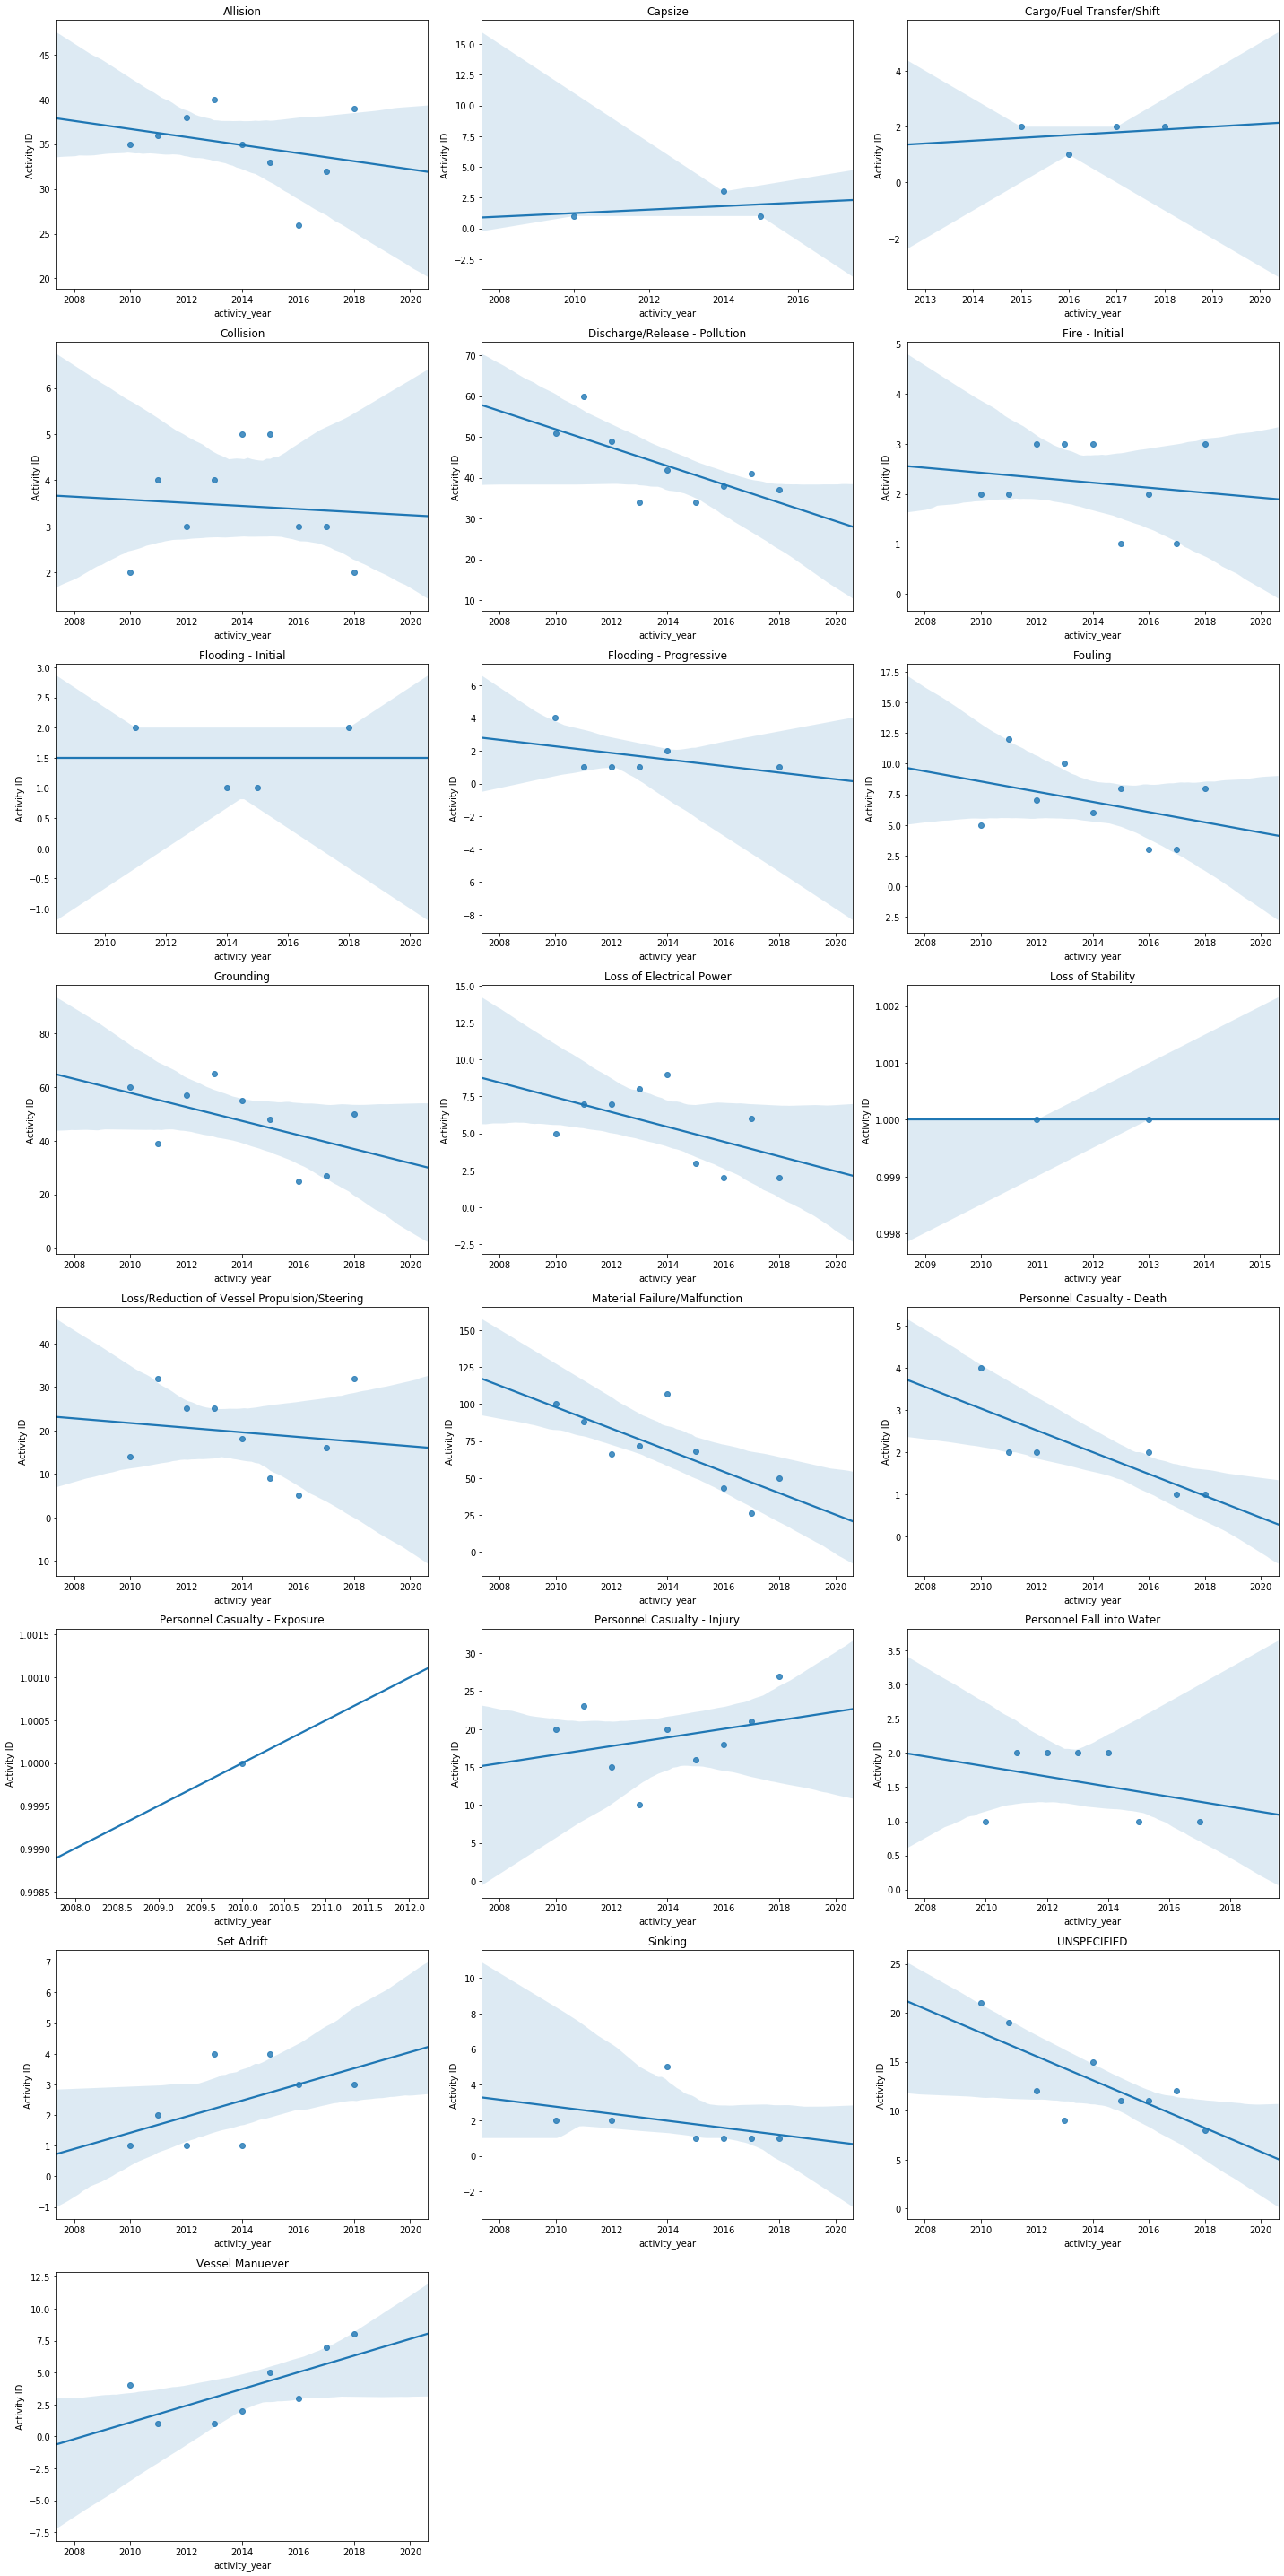

In [77]:
gb_inc_type = incidents_full.groupby(['Incident Involved','activity_year'])['Activity ID'].count().reset_index()

# Make the graph 20 inches by 40 inches
plt.figure(figsize=(20,40), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1
for incidenttype, selection in gb_inc_type.groupby('Incident Involved'):
    # Inside of an image that's a 3x8 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(8, 3, plot_number)
    
    sns.regplot(x='activity_year', y='Activity ID',data=selection, fit_reg=True, ax=ax, label=incidenttype) 
    #selection.plot(x='activity_year', y='Activity ID', ax=ax, label=incidenttype, legend=False)
    
    ax.set_title(incidenttype)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

Well that's pretty fucking awesome.

Ok now let's checkout our indicators on the brief notes we've taken.

In [79]:
#serious_incidents.head()

In [80]:
by_unclear = serious_incidents.groupby('activity_year')['investigate_further'].sum()
by_unclear

activity_year
2010    2.0
2011    6.0
2012    2.0
2013    5.0
2014    5.0
2015    0.0
2016    0.0
2017    3.0
2018    0.0
Name: investigate_further, dtype: float64

In [81]:
by_highwater = serious_incidents.groupby('activity_year')['high_water_strong_current'].sum()
by_highwater

activity_year
2010    0.0
2011    2.0
2012    0.0
2013    0.0
2014    0.0
2015    1.0
2016    3.0
2017    1.0
2018    4.0
Name: high_water_strong_current, dtype: float64

## Text analysis high water designation

I'm going to try a little text analysis on all of the incidents that have briefs to see if we can get an idea of annual mentions of high water. Here are some of the terms we're going to look for:

- high water
- high waters
- strong current
- strong currents
- excessive river water flow
- excessive water flow
- excessive flow
- high river water
- swift water
- swift waters

In [83]:
water_list = ['high water','high waters','strong current','strong currents',
             'excessive river water flow','excessive water flow','excessive flow',
             'high river water','swift water','swift waters']

incidents_full['high_water'] = False
high_water = incidents_full['incident_brief'].str.contains(water_var, na=False)

for water_var in water_list:
    incidents_full['high_water'] = np.where(incidents_full['high_water'] != True, high_water, incidents_full['high_water'])
        

In [84]:
pd.set_option('display.max_colwidth', -1)
incidents_full.groupby('high_water')['Case ID'].count()

by_highwater = pd.pivot_table(incidents_full, values='Activity ID', 
                                index='high_water',
                                columns=['activity_year'], aggfunc='count')

by_highwater.loc['Total Incidents'] = by_highwater.sum()
by_highwater.loc['Percent high']= (by_highwater.loc[True] / by_highwater.loc['Total Incidents'])*100
by_highwater
#incidents_full[incidents_full['high_water'] == 1]#['activity_year','incident_brief']

activity_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
high_water,,,,,,,,,
False,324.000000,327.000000,289.000000,288.000000,330.000000,248.000000,184.000000,196.0,267.00000
True,9.000000,6.000000,1.000000,1.000000,1.000000,3.000000,2.000000,4.0,9.00000
Total Incidents,333.000000,333.000000,290.000000,289.000000,331.000000,251.000000,186.000000,200.0,276.00000
Percent high,2.702703,1.801802,0.344828,0.346021,0.302115,1.195219,1.075269,2.0,3.26087


## Manual checks

I want to manually checkout some of the 2018 personal injury serious accidents

In [5]:
pd.set_option('display.max_colwidth', -1)
inc201718 = incidents_full['activity_year'].isin([2018])
inj = incidents_full['Incident Involved'] == 'Personnel Casualty - Injury'
vm = incidents_full['Incident Involved'] == 'Vessel Manuever'
sa = incidents_full['Incident Involved'] == 'Set Adrift'

bellaire = incidents_full[incidents_full['Activity ID'] == '6338770']
bellaire
#inc2015 = incidents_full.loc[incidents_full['activity_year'] == 2015]
#
#injury201718 = incidents_full.loc[(inc201718) & (inj)]
#vm201718 = incidents_full.loc[(inc201718) & (vm)]
#sa201718 = incidents_full.loc[(inc201718) & (sa)]
#
#for activity_id in incidents_full.loc[inc201718]['Activity ID'].tolist():
#    display(incidents_full[incidents_full['Activity ID'] == activity_id][['Activity ID','Activity Date','Case Title','incident_brief']])
    
    

/Users/akanik/.virtualenvs/kycir-river-security/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Case ID,Activity ID,Activity Date,Originating Department,Owner Department,Controlling Department,Cargo Property Damage,Facility Property Damage,Other Property Damage,Vessel Property Damage,Total Property Damage,Total Persons at Risk,Total Persons Dead,Total Persons Missing,Total Persons Injured,Vessels Actual Total Loss,Vessels Constructive Total Loss,Vessels Damaged,Vessels Undamaged,Level of Investigation,IMO Designation,US Designation,Serious Marine Incident Designation,Latitude,Longitude,Activity Title,Case Title,Incident Involved,activity_id_x,incident_brief,activity_id_y,high_water_strong_current,snow_ice,wind,crew_experience,crew_error,equipment_malfunction,waterway_obstruction,non_vessel,routine_human_error,investigate_further,possible_witnesses,notes,activity_year


In [89]:
display(incidents_full[incidents_full['Activity ID'] == 6338770])

,X,Y,Case ID,Activity ID,Activity Date,Originating Department,Owner Department,Controlling Department,Cargo Property Damage,Facility Property Damage,Other Property Damage,Vessel Property Damage,Total Property Damage,Total Persons at Risk,Total Persons Dead,Total Persons Missing,Total Persons Injured,Vessels Actual Total Loss,Vessels Constructive Total Loss,Vessels Damaged,Vessels Undamaged,Level of Investigation,IMO Designation,US Designation,Serious Marine Incident Designation,Latitude,Longitude,Activity Title,Case Title,Incident Involved,activity_id_x,incident_brief,activity_id_y,high_water_strong_current,snow_ice,wind,crew_experience,crew_error,equipment_malfunction,waterway_obstruction,non_vessel,routine_human_error,investigate_further,possible_witnesses,notes,activity_year,high_water
2222,-80.728508,40.046847,1112600,6338770,2018-01-13,MSU PITTSBURGH (007764),D8 PREVENTION DIV (DP) (008174),NaN,"$320,000.00","$50,000.00",$0.00,"$800,000.00","$1,170,000.00",NaN,0,0,0,0,2,9,19,Informal,Routine,Major Marine Casualty,Serious Marine Incident,40.046847,-80.728508,Bellaire - Barge Breakaway,MS-Breakaway-Bellaire Services Fleet-MM 93 OHR,Set Adrift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,False


-------------------------------
## Create the brief notes

Let's create variables for each year's serious incidents so we can look over them and create our `brief_notes` dataset.

In [9]:
serious2018 = serious_incidents.loc[serious_incidents['activity_year'] == 2018].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2017 = serious_incidents.loc[serious_incidents['activity_year'] == 2017].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2016 = serious_incidents.loc[serious_incidents['activity_year'] == 2016].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2015 = serious_incidents.loc[serious_incidents['activity_year'] == 2015].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2014 = serious_incidents.loc[serious_incidents['activity_year'] == 2014].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2013 = serious_incidents.loc[serious_incidents['activity_year'] == 2013].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2012 = serious_incidents.loc[serious_incidents['activity_year'] == 2012].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2011 = serious_incidents.loc[serious_incidents['activity_year'] == 2011].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)
serious2010 = serious_incidents.loc[serious_incidents['activity_year'] == 2010].sort_values(['activity_year','Total Property Damage'], 
                                                                                            ascending=False)

In [68]:
pd.set_option('display.max_colwidth', -1)

for activity_id in serious2018['Activity ID'].tolist():
    display(incidents_full[incidents_full['Activity ID'] == activity_id][['Activity ID','incident_brief']])


,Activity ID,incident_brief
3030,6338838,NaN


,Activity ID,incident_brief
3031,6338770,NaN


,Activity ID,incident_brief
3376,6609824,Incident Brief Under Review


,Activity ID,incident_brief
3151,6391830,"On 13APR2018 at approximately 1500 hrs. the M/V CHARLEY WALLACE( CGB, 1000HP,ON 623276) was doing fleet work at the IL # 13 Fleet RDB MM 980 OHR when they were leaving the fleet downbound maneuvering back into the channel when the Port MDE had a reduction in propulsion and would not go over 700 RPM (Clutch speed). This caused the vessel to become pinned on its Starboard side against the fleet, and the vessel began taking on water and listing to Port. At that time the master came full ahead on the STRB MDE and was able to clear the fleet. The port list of the vessel caused by the intake of water continued, allowing a downflooding condition. The vessel subsequently sunk approximately 100 ft from the IL # 13 Fleet RDB. All crew was able to exit the vessel in the water and was rescued by an assist vessel. Crewman did not experience any injuries from the incident, however a discharge of oil that created a sheen upon the navigable waters of the United States was observed as the vessel was sinking. Location of the sunk vessel was marked and salvage plans were initiated. As of 17JUL18, the vessel was not yet salvaged due to water conditions. Unknown date as to when the salvage will be complete. Current plans are to refurbish vessel once recovered.\n\nCoast Guard investigation revealed the initiating event to be the sinking of the vessel. Contributing factors include 1)Unintended reduction in propulsion at a critical time of vessel operation. 2)High currents and river stage."


,Activity ID,incident_brief
3155,6394401,"At approximately 1105 on 18APR18 the M/V LEXINGTON (Tennessee Valley Towing, 5600 HP, 508204) was pushing 15 loaded barges (7 pig iron, 4 corn, 1 DRI, 1 bauxite, and 2 fly ash) U/B at MM 964 OHR when the head of the tow got caught in the current and pushed to port. The pilot on watch steered to stbd to try and catch the head but a face wire and wing wire broke on the STBD side. Crew attempted to catch more wires on tow but was unsuccessful and tow continued to drift to port as pilot was unsuccessful in stopping the head from swinging to port. Tow made contact with the long wall of Olmsted Lock causing 6 barges to break free of the tow. 4 barges were corraled without incident while 1 barge was pinned up against a construction barge at the Olmstead L&D and 1 barge pressed sideways straddling the #4 and #5 tainter gates at Olmstead L&D and sank. \n\nCoast Guard investigation revealed the initiating event to be the material failure of the tow wires. Contributing factors include 1) Strong currents due to high water. 2) Unknown age/material condition of tow wires in use. 3) Lack of high water experience by pilot."


,Activity ID,incident_brief
3387,6603647,Incident Brief Under Review


,Activity ID,incident_brief
3046,6344275,"On January 20, 2018, at approximately 2339 central time the barge ING905 was being loaded with coal at Mt. Vernon Transfer Terminal, mile marker 827.9 on the Ohio River. At approximately 2340 one of the barge workers heard water entering into void tanks on the IMG905. The void taking water in was found and attempts were made to put dewatering pumps into the space but were unsuccessful. At 2350 barge ING905 was approximately 88 percent loaded with approximately 3221 tons of coal when it buckled at the center line and began to sink. All workers exited the barge/ loading dock and made it to safety with no injuries. One of the two sections of the barge was able to be tied off to the river bank, while the other section of the barge sank and floated down river before being secured to a mooring cell.\n\n\nThe Coast Guard's investigation found the initiating event was the lack of preventive maintenance on the barge’s structural framing. Also, there was no record of inspection intervals on the hull’s plating, which failed during the on-loading of the coal."


,Activity ID,incident_brief
3319,6568680,Incident Brief Under Review


,Activity ID,incident_brief
3243,6490139,Incident Brief Under Review


,Activity ID,incident_brief
3263,6511680,Incident Brief Under Review


,Activity ID,incident_brief
3105,6381153,"19Mar18; 0005: The UTV RYAN MICHAEL MURRAY was transiting unbound on the Ohio River in the vicinity of mile marker 85 with 16 loaded coal barges in tow. The vessel's stern got set toward the left descending bank, the pilot attempted to bring it back around to starboard and was unable to. The second barge in the 2 port strings ran grounded and began taking on water. One of the affected barges hull was punctured by a log in the river bottom. The affected barge began to sink and pulled down the surrounding moored barges along with it. Four barges total were affected. the Towing vessel RYAN M MURRAY remained undamaged.\n\nFour affected barges on RYAN M MURRAYs tow were damaged up to $200,000 and $20,000 of coal was unrecoverable. All barges were salvaged and removed from the waterway.\n\nAs a result of this investigation, the Coast Guard has determined that the initiating event for this casualty was the grounding of the tow. this was followed by the the second barge in the 2 port string sinking and pulling down its surrounding moored barges. The casual factors that contributed to this casualty include: (1) Misjudged lock Approach and (2)River bottom hazard."


,Activity ID,incident_brief
3381,6670206,Incident Brief Under Review


,Activity ID,incident_brief
3118,6402616,"At approximately 1740 on March 31, 2018, the towing vessel DIANE B SIEGEL was making a tow at a fleeting area, MM94 on the Ohio River, of 26 dry cargo barges. The Ohio River was in high water and the current was swift. While the vessel was working the fleet the headline of the fleet failed and the 26 barge fleet broke away from the mooring cells. The breakaway barges allided with 07 dry cargo barges at the Shoemaker Fleeting Facility directly down river at MM 93.9 OHR LDB. 02 barges from this facility then crossed the river and allided with 01 crane barge and 01 dry cargo barge at Bellaire Harbor Services dock MM 94 RDB and also allided with their dock. \n\nAll barges were caught and secured at a fleeting area. no barges reported damages beyond cosmetic, but the Bellaire harbor Facility received 150,000+ in structural and equipment damage. The DIANE B SIEGEL crew conducted drug and alcohol testing, achieving a negative result.\n\nAs a result of this investigation, the Coast Guard has determined that the initiating event for this casualty was the material failure of the mooring lines. this was followed by the barge fleeting breakaway, downriver fleet allison, and across river dry dock allison. The causal factors that contributed to this casualty include: (1)Mooring Lines tensile strength, (2)History of violating barge width on barge fleeting permit, (3)High water and strong river current, (4)Towing vessel pressure on fleet during fleet makeup, (5)Hourly Fleet checks were an inadequate as a singular defense to detect mooring equipment failure, (6)Inadequate mooring equipment."


,Activity ID,incident_brief
3134,6399436,Incident Brief Under Review


,Activity ID,incident_brief
3194,6437830,Incident Brief Under Review


,Activity ID,incident_brief
3021,6334322,NaN


,Activity ID,incident_brief
3026,6339984,"At approximately 0700 on 11JAN18, crewmember was working on a deckplate in the engine room of the JOHN F SECREST when the deckplate slipped causing a laceration of the crewmembers hand. Crewmember was taken to a local medical facility where he had to have sutures and was given restricted duty.\n\nCoast Guard investigation revealed the initiating event to be the injury to the crewmembers hand. Contributing factor includes crewmember's inability to maintain control of the deckplate while working."


,Activity ID,incident_brief
3040,6339530,"While preparing to release tow from fleeting area to head down bound on the Monongahela River at the MM 34.6, a crew member of the UTV SOPHIA KATERIN MURRAY slipped on the ice on a barge, striking his head and upper back on the deck. Injury resulted in a mild concussion that required treatment beyond first aid.\n\nInvestigation found that crewmember was injured due to adverse weather conditions, ice and loosing his balance on the ice."


,Activity ID,incident_brief
3047,6350955,"Crewmember was walking a fleet of crane barges moored at Amherst Madison's Marine Repair Dock at Ohio River mile 266.5 right bank. Crewmember slipped on a patch of ice, lost his footing and fell landing on his right elbow and right side of his body. Crewmember was transported to a local hospital.\n\nMedical reports indicate that no broken bones or severe injury occurred from the fall. Crewmember spent 3 days in the hospital because the wound to his elbow was not healing properly.\n\nIO Note: Marine Casualty Level of Investigative Effort will remain at the Data Collection Investigation level since there is no determinable value likely to benefit the marine safety industry IAW COMDTINST M16000.10A Part B, Ch. 7, A.2.a."


,Activity ID,incident_brief
3051,6351017,"At approximately 0530 on 26JAN18 the M/V JVESSCO 1 (Tenn. Valley Towing, 582316, 2400HP) was moored at MM 951 LMR (Wickliffe, KY) when a deckhand tripped on deck fittings while boarding the UTV. The crewmember was taken to Health Works Ready Care in Paducah KY where he was diagnosed with a injured ankle. The crewmember was placed on light duty for 04 days. \n\nCoast Guard investigation revealed the initiating event to be the injury to the crewmember. Contributing factors include 1) Time of day. 2) Tripping hazards present on deck of vessel."


,Activity ID,incident_brief
3062,6352723,"While making preparations to get a tow underway at MM 93 of the Ohio River, a crew member of the UTV LESLIE NEAL fell, landing on his right hand. Crewmember sustained a sprained right wrist. A medical doctor placed crewmember in a no work status and prescribed a prescription pain killer.\n\nCause of incident was a loss of situational awareness while carrying cables."


,Activity ID,incident_brief
3086,6371956,Towing vessel CAPT TOMMY PARRISH was mooring up barge ACL-505 to a fleeting area when the winch failed and the dog handle struck the deckhand's arm between the wrist and elbow. The deckhand was medically evaluated and it was determined that his arm was broken. The deckhand was sent to the hospital for treatment via ambulance and the hospital was unable to conduct a DOT drug test for a SMI. The alcohol test was conducted by the vessels crew via alcohol test strip.\n\nThe winch failure was a result of excessive force on the winch due to high river water levels and excessive river water flow.


,Activity ID,incident_brief
3113,6381325,"At approximately 2030 on 26MAR18, as a crewmember of the UTV JAMES H. HUNTER, was conducting tow work at Eddyville Port Authority when he stepped from one barge to another, approx 1' difference in height. As he stepped down, crewmember tripped on a wire, fell foward and caught himself with both hands. His left wrist began to swell and bruise. Crewmember was directed to a medical facility where the crewmember was diagnosed with ""closed non-displaced fracture"" of the left wrist.\n\nCoast Guard investigation determined the initiating event was the fracture of the left wrist. Contributing factors include deckhand's lack of care and awareness as he stepped from barge to barge."


,Activity ID,incident_brief
3131,6386110,"The employee was changing out a barge winch wire on a tow. The employee attempted to pull or jerk the wire through the channel, and could not get it to come loose. The end result was a sharp pain in the lower back and right side to hip thigh. Employee conducted company directed SMI alcohol and drug testing."


,Activity ID,incident_brief
3136,6393291,Incident Brief Under Review


,Activity ID,incident_brief
3150,6398635,"While working the fleet in Kenova, WV crewmember was struck in the arm by a crank of a winch when it was free spinning. The winch was free spinning because another crewmemeber released the winch break. Crewmember suffered a fractured arm. Crewmember was placed on light duty."


,Activity ID,incident_brief
3158,6399845,Incident Brief Under Review


,Activity ID,incident_brief
3176,6416140,"UTV WINNIE C (Campbell Transportation, 590109, 2600HP) pushing 15 loaded coal barges (5x3) down bound at MM 134 OHR, and grounded the starboard lead barge into the RDB. The grounding resulted in damage sustained to the starboard lead barge to the extent that it was taking on water. The UTV WINNIE C was able to push the tow across the river near the bank at Williamson Island, outside the channel.\n\nInvestigation revealed that the pilot fell asleep while at the helm and was woken up when the lead barges made contact with the bottom of the river near the right descending bank."


,Activity ID,incident_brief
3177,6427399,"On 15MAY18, while carrying a 35' wire aboard the M/V NICKSON, a deckhand caught the wire on a door handle and wrenched his back. Crewmember initially reported only minor pain and refused medical treatment. The next morning, he was still experiencing pain and was taken off the vessel for medical treatment. Crewmember diagnosed with a lumbar strain. He was given a return to work letter with restrictions of no bending and not lifting weights over 15 lbs. No alcohol testing was completed because crewmember initially did not need medical treatment.\n\nCoast Guard investigation determined the initiating event to be the injury to the crewmember. Contributing factors include: 1) Loss of situational awareness."


,Activity ID,incident_brief
3185,6429305,"On 25MAY2018, Sector Ohio Valley received a report from the P/V GLORY OF ROME (Horseshoe Casino) in Bridgeport, IN that a passenger missed a step while going down an escalator and fell at 0020 on 24 MAY 18. The passenger was transported to Baptist Floyd Hospital in New Albany, IN for treatment of a cut and contusion to the head. The injured person received sutures and was released after approximately one hour of treatment.\n\nThe CG investigation identified the initiating event as the passenger's attempt to retrieve a shoe that became lodged or wedged between treads of the escalator while descending to a lower deck. As the passenger reach for the shoe and the escalator treads began flattening at the end of passenger travel, the passenger lost their balance, fell and banged their head into the based of the escalator, resulting in injury."


,Activity ID,incident_brief
3190,6490621,"On 04JUN2018 at 0750, the M/V NELL (O.N. 294045, Amherst Madison, 1400 HP) reported that a crewmember was struck in the head by a cheater pipe while working a ratchet on a tow located at MM 267.5 on the Ohio River. The crewmember was taken to Pleasant Valley Hospital in Point Pleasant, WV. The crewmember will be replaced.\n\nThe investigation revealed that the injured deckhand was not maintaining a safe distance from the highly tensioned ratchet/cheater pipe."


,Activity ID,incident_brief
3220,6472973,"On 28JUN2018 at approximately 1045 local time, the Uninspected Towing Vessel (UTV) USS 4 (ON 267971) was conducting fleet work in the vicinity of mile marker 22 of the Monongahela River. During the fleeting operations, a deckhand fell into an empty hopper barge sustaining injuries as result. The injured deckhand was taken by ambulance to Mercy General in Pittsburg PA, where he was evaluated and treated for his injuries.\n\nThe deckhand was working with multiple lines connecting multiple barges between themselves and the wharf. He was holding a line that was subjected to strain that the deckhand failed to anticipate. As a result, when the line suddenly went taut, the deckhand failed to release the line and was lifted off the deck of the barge (ING2138). Once airborne, the deckhand was propelled over the coaming of the barges hopper when he lost his grip and fell into the empty hopper and sustained multiple injuries: fractured ribs, fractured hip, and a head injury.\n\nAs a result of its investigation, the Coast Guard has determined that the initiating event for this casualty was the deckhands fall into an empty hopper of the barge he was standing on which resulted in injuries. The casual factor that contributed to this casualty was the deckhand’s inattention to the potential affects (slackening and tautening) of the multiple lines he was working with and around.\n\nRecommend this incident investigation be closed with no referral for enforcement."


,Activity ID,incident_brief
3226,6482267,"On 02 July 2018, at approximately 2315 CST, the M/V TENNESSEE (AMHERST MADISON, 6000HP, 502171) was conducting work and transiting D/B at MM 966 OHR LDB when a crewmember was walking from the front of the towboat around the starboard guard to access the starboard side doors to the deck locker. The crew member was temporarily blinded by the vessel's searchlight, but he continued to walk and tripped over starboard wing wire which caused him to break his fibula and tibia in the right lower leg. The crew member was taken off the UTV and driven to CAMDEN Clark Memorial Hospital (Parkersburg, WV) and the crewmember was replaced. DOT Drug and alcohol testing was conducted. \n\nThe Coast Guard investigation revealed the IE to be the injury. Contributing factor includes: (1) Marijuana metabolite present in crew member's system may have contributed to crew member tripping over wire, (2) Crew member temporarily bilnded by search light, (3) Loss of situational awareness."


,Activity ID,incident_brief
3237,6491371,Incident Brief Under Review


,Activity ID,incident_brief
3239,6492601,Incident Brief Under Review


,Activity ID,incident_brief
3274,6524149,Incident Brief Under Review


,Activity ID,incident_brief
3283,6535230,Incident Brief Under Review


,Activity ID,incident_brief
3305,6635800,Incident Brief Under Review


,Activity ID,incident_brief
3307,6554098,Incident Brief Under Review


,Activity ID,incident_brief
3323,6636149,Incident Brief Under Review


,Activity ID,incident_brief
3335,6597638,Incident Brief Under Review


,Activity ID,incident_brief
3340,6579851,Incident Brief Under Review


,Activity ID,incident_brief
3359,6634967,Incident Brief Under Review


,Activity ID,incident_brief
3366,6601383,Incident Brief Under Review


,Activity ID,incident_brief
3373,6599019,Incident Brief Under Review


In scanning for notes on reasons why something happened, also include trigger word "conditions..."